![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Basic Data Cleaning and EDA

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in the `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is and _claim amounts_. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

**Some business Objectives for the case study could be**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions


1. Import the necessary libraries.

In [248]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import mode

2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df` (i.e. `customer_df = pd.readcsv("")`)


In [249]:
#importing data
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') # this file is in files_for_lesson_and_activities folder



3. First, look at its main features (`head`, `shape`, `info`).


In [250]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [251]:
customer_df.shape

(9134, 24)

In [252]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case).


In [253]:
customer_df = customer_df.rename(columns=lambda x: x.replace(' ', '_'))


In [254]:
customer_df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. **Hint**: One thing you can try is to change date column to datetime format.

In [255]:
print(customer_df['Effective_To_Date'].dtype)

# Cambiar el formato de la columna 'fecha' a datetime
customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'])

# Verificar el nuevo tipo de datos de la columna 'fecha'
print(customer_df['Effective_To_Date'].dtype)

object
datetime64[ns]


6. Plot a correlation matrix, and comment on what you observe.


In [256]:
# Check the numerical variables
customer_dfN = customer_df.select_dtypes(np.number)
customer_dfN.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [257]:
customer_dfN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Lifetime_Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly_Premium_Auto           9134 non-null   int64  
 3   Months_Since_Last_Claim        9134 non-null   int64  
 4   Months_Since_Policy_Inception  9134 non-null   int64  
 5   Number_of_Open_Complaints      9134 non-null   int64  
 6   Number_of_Policies             9134 non-null   int64  
 7   Total_Claim_Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [258]:
# Diferenciamos los datos categoricos de los numericos
customer_dfO= customer_df.select_dtypes(object)


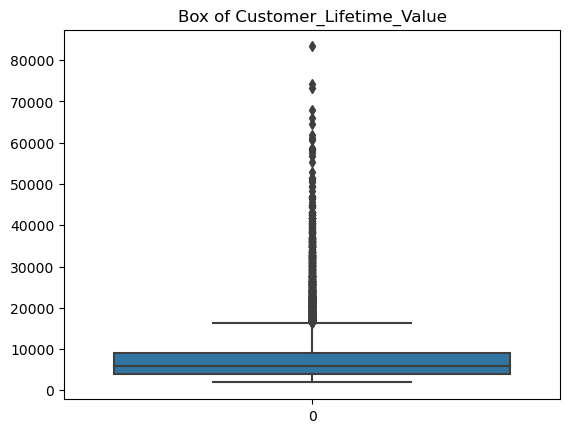

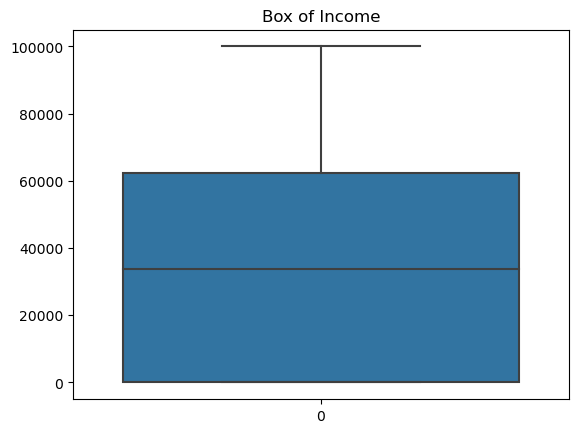

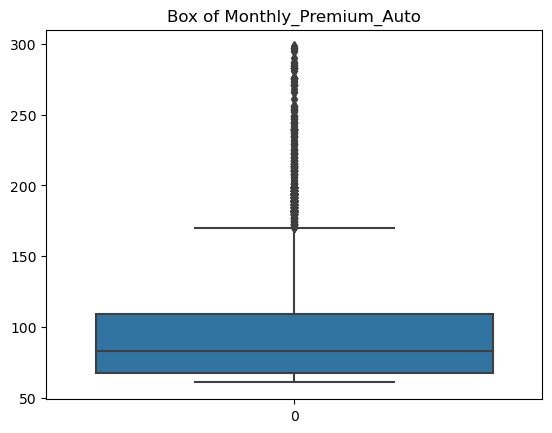

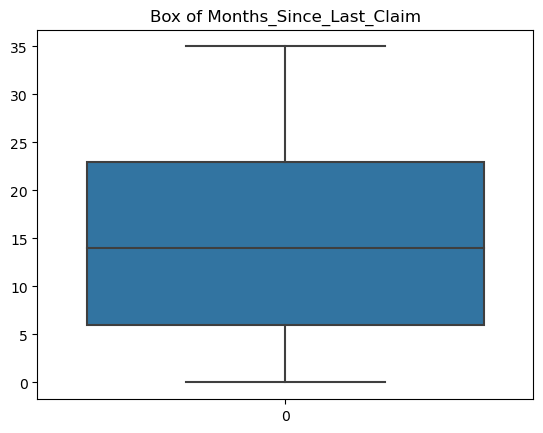

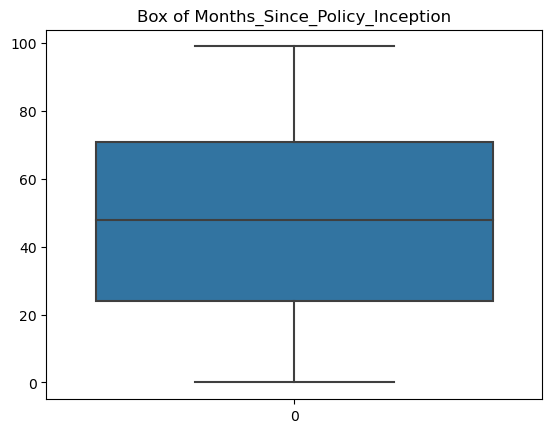

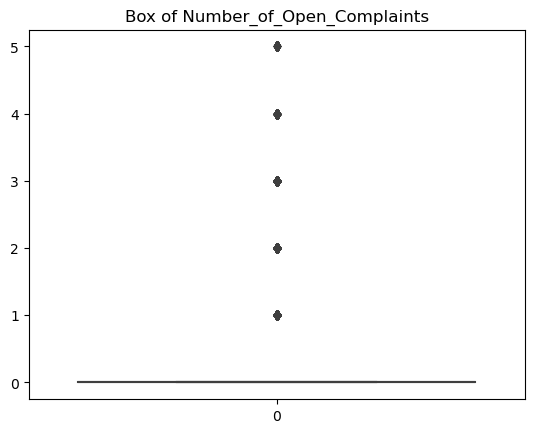

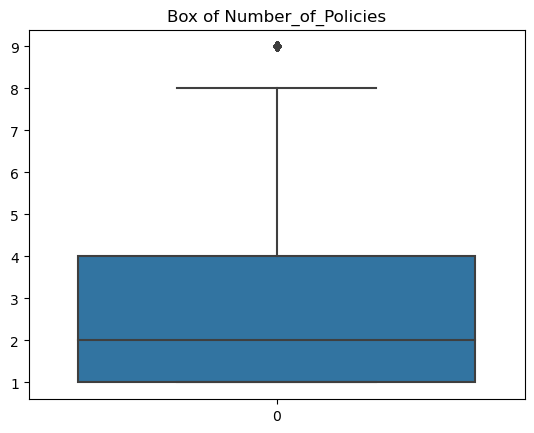

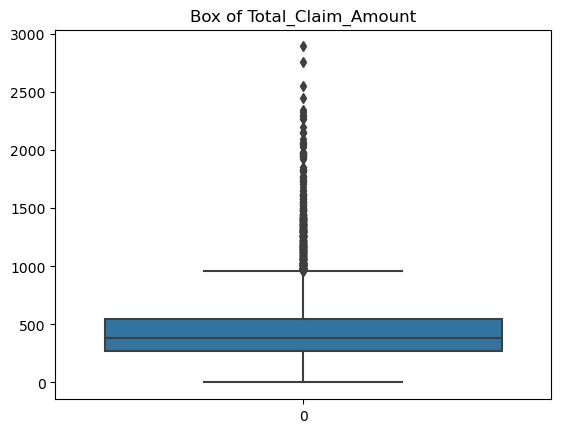

In [259]:
for column in customer_dfN.columns:
    sns.boxplot(customer_dfN[column])
    plt.title(f"Box of {column}")
    plt.show()

<Axes: >

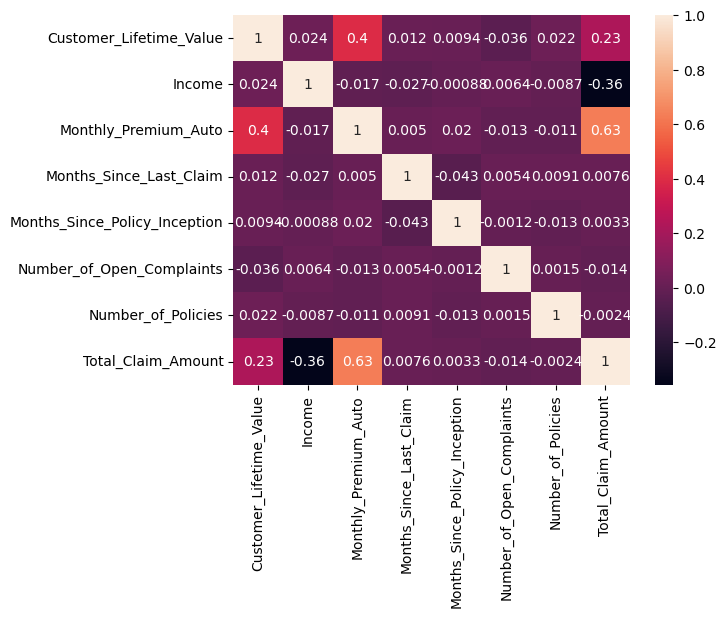

In [260]:
corr_matrix = customer_dfN.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)

### Conclusión:

En la matriz de correlación, se observa una correlación positiva más fuerte entre Monthly_Premium_Auto y Total_Claim_Amount en comparación con la correlación entre Customer_Life_Value, Income y Monthly_Premium_Auto con Total_Claim_Amount.

Monthly_Premium_Auto y Total_Claim_Amount: Estas dos variables muestran una correlación positiva significativa. Esto sugiere que a medida que aumenta la prima mensual del seguro de automóvil (Monthly_Premium_Auto), también tiende a aumentar el monto total de reclamación del seguro (Total_Claim_Amount). Es posible que los clientes que pagan primas mensuales más altas tengan mayores probabilidades de presentar reclamaciones de mayor monto.

Customer_Life_Value y Total_Claim_Amount: Aunque la correlación entre Customer_Life_Value y Total_Claim_Amount es más débil que la correlación entre Monthly_Premium_Auto y Total_Claim_Amount, todavía existe una relación positiva. Esto indica que a medida que aumenta el valor de vida del cliente (Customer_Life_Value), hay una tendencia a que aumente el monto total de reclamación del seguro (Total_Claim_Amount), aunque la relación no es tan fuerte como en el caso de Monthly_Premium_Auto.

Income y Total_Claim_Amount: Estas dos variables presentan una correlación negativa. Esto implica que a medida que el ingreso del cliente (Income) aumenta, tiende a disminuir el monto total de reclamación del seguro (Total_Claim_Amount). Una posible explicación podría ser que los clientes con ingresos más altos pueden permitirse mejores prácticas de seguridad y mantenimiento de vehículos, lo que reduce la frecuencia o gravedad de los reclamos.

Al interpretar los resultados, es importante tener en cuenta la fuerza relativa de las correlaciones y compararlas entre sí. La correlación positiva más fuerte entre Monthly_Premium_Auto y Total_Claim_Amount indica una relación más pronunciada en comparación con las otras variables.



7. Plot every continuous variable. Comment what you can see in the plots.

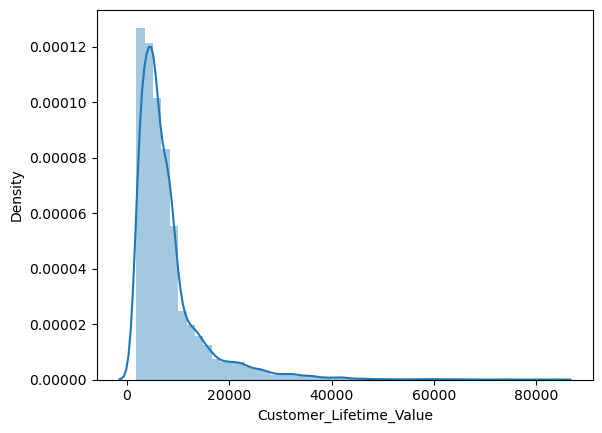

Mediana 5780.182197
Moda 2004.350666
Desviacion estandar 6870.5914776541185


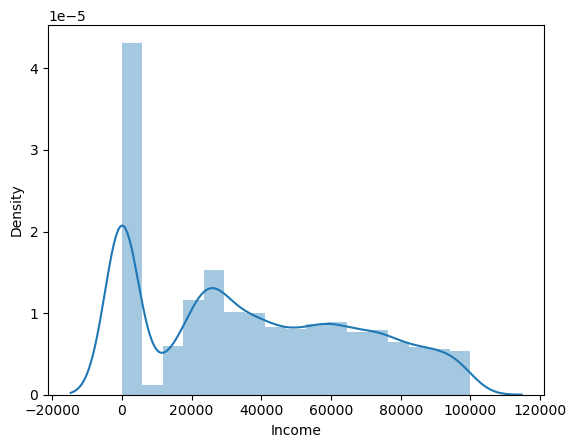

Mediana 33889.5
Moda 0
Desviacion estandar 30378.241676243542


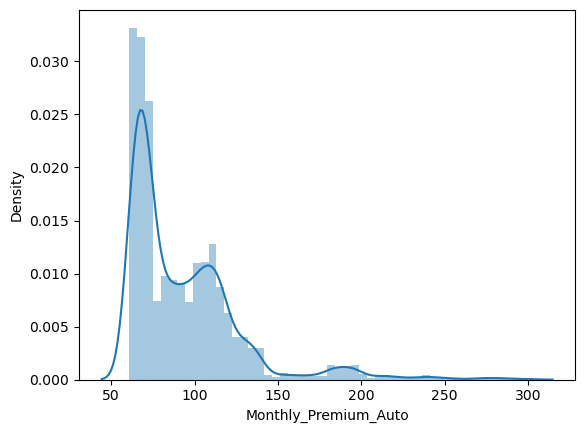

Mediana 83.0
Moda 65
Desviacion estandar 34.40608380986521


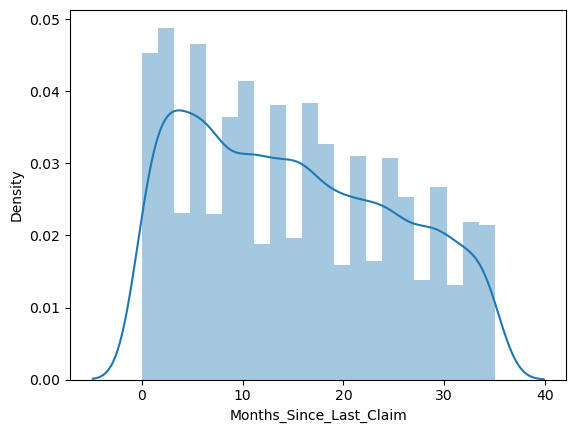

Mediana 14.0
Moda 3
Desviacion estandar 10.072705140898618


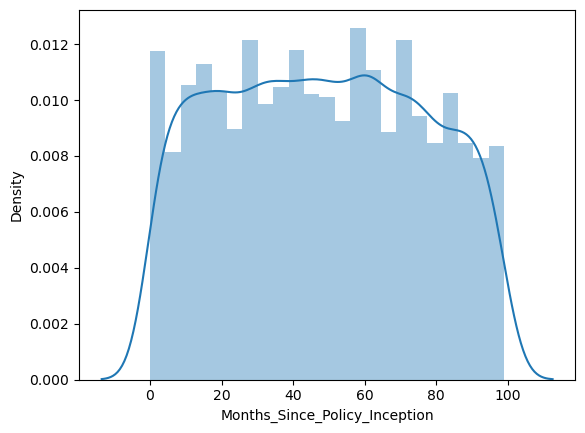

Mediana 48.0
Moda 59
Desviacion estandar 27.90446315372982


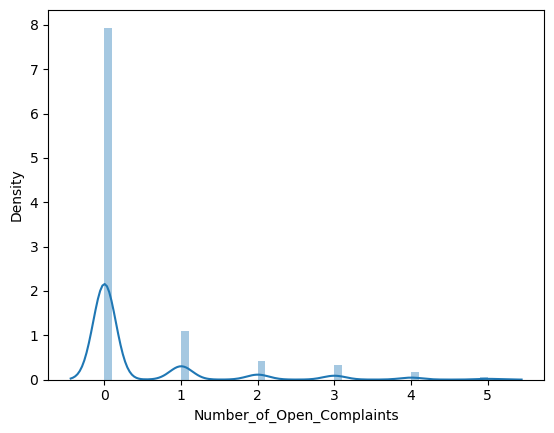

Mediana 0.0
Moda 0
Desviacion estandar 0.910333695372501


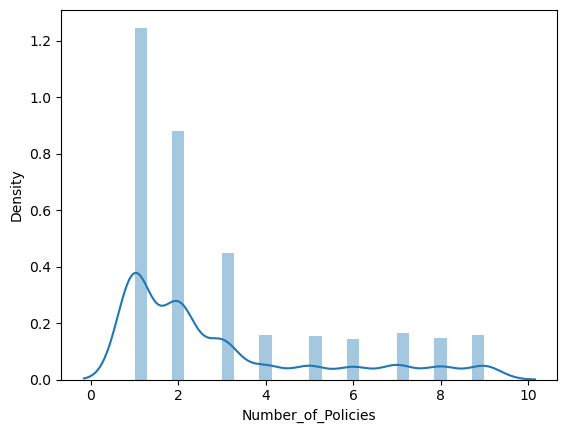

Mediana 2.0
Moda 1
Desviacion estandar 2.390050966300996


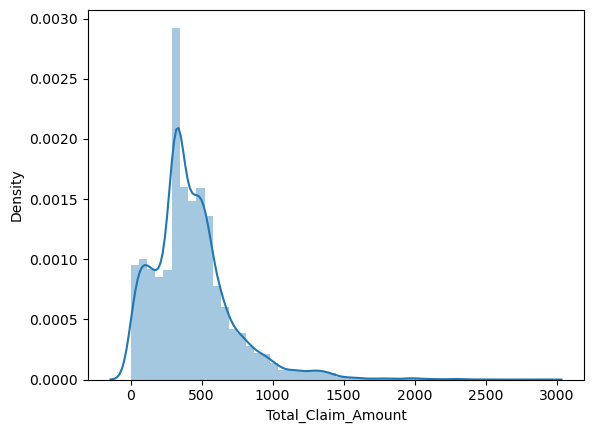

Mediana 383.94543350000004
Moda 316.8
Desviacion estandar 290.48418923888653


In [261]:

for columns in customer_dfN.columns:
    sns.distplot(customer_dfN[columns])
    plt.show()
    # Calcular la mediana
    median = np.median(customer_dfN[columns])
    print('Mediana', median)
    
    # Calcular la moda
    mode_val = mode(customer_dfN[columns]).mode[0]
    print('Moda', mode_val)
    
    # Calcular la desviación estándar
    std = np.std(customer_dfN[columns])
    print('Desviacion estandar', std)

8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. 
You should also delete the column `customer_id` before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column `customer_id` required. **Hint**: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [262]:
# Check the categorical variables
customer_dfO = customer_df.select_dtypes(object)
customer_dfO

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [263]:
# Debemos eliminar customer id, ya que es una variable que identifica al consumidor y es irrelevante para el análisis.

customer_dfO = customer_dfO.drop(['Customer'], axis=1)


In [264]:
customer_dfO = pd.DataFrame(customer_dfO)

In [265]:

for column in customer_dfO.columns:
    print(customer_dfO[column].value_counts())



California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: Location_Code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy_Type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


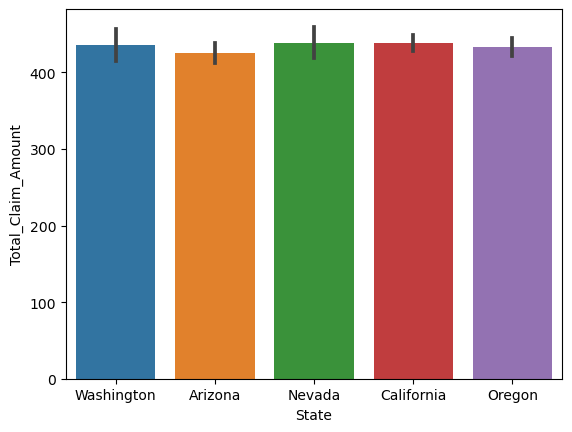

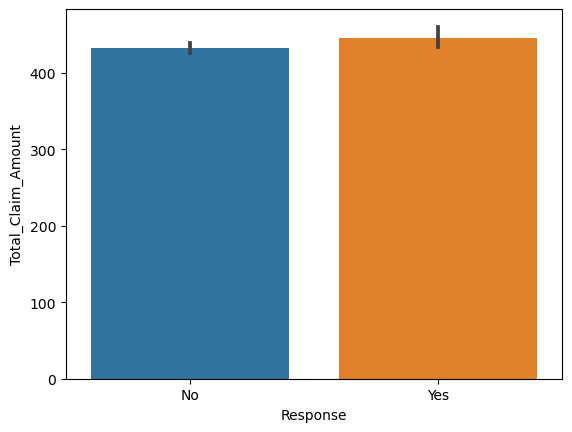

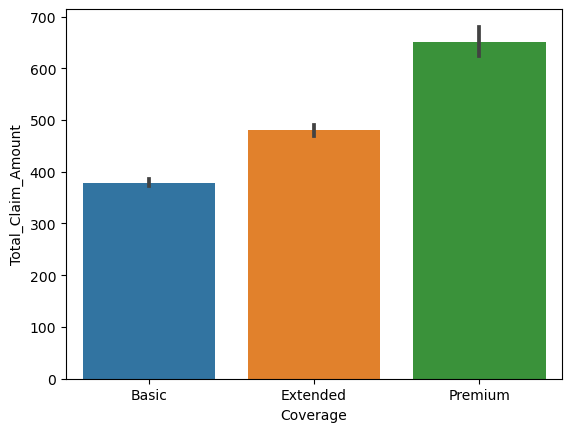

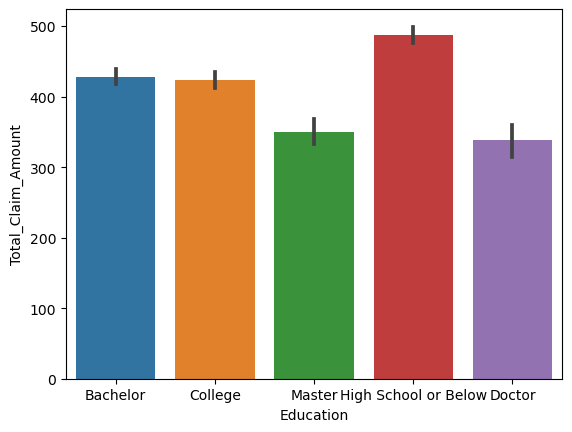

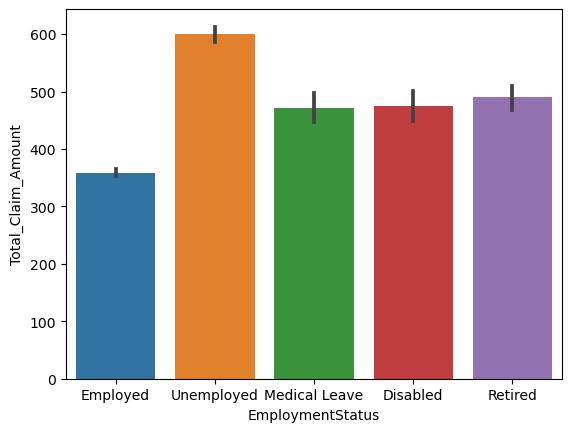

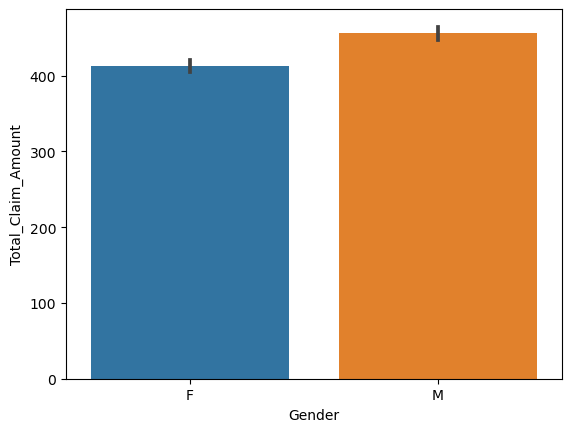

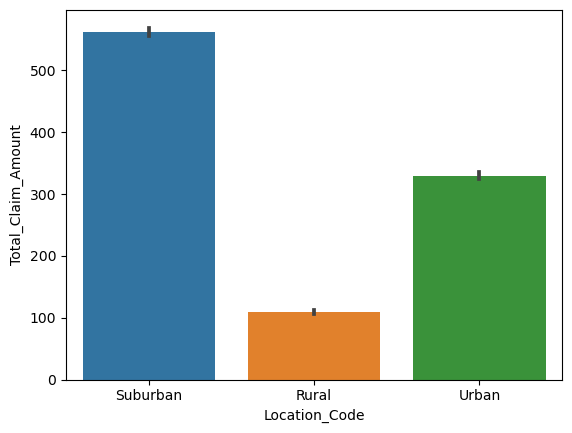

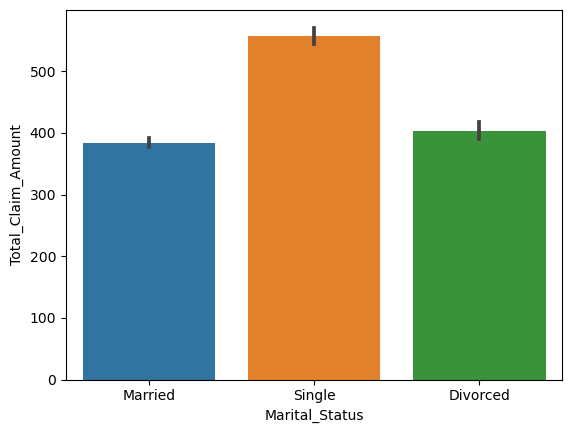

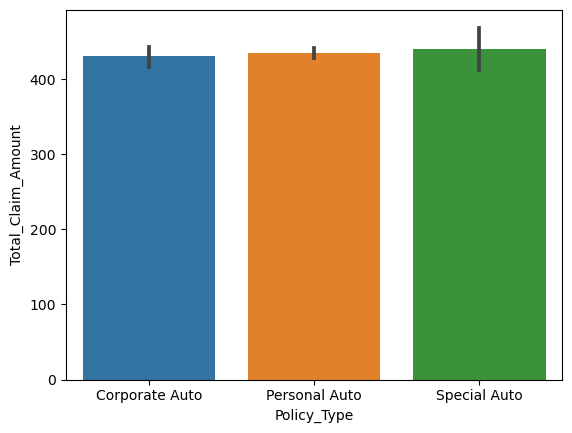

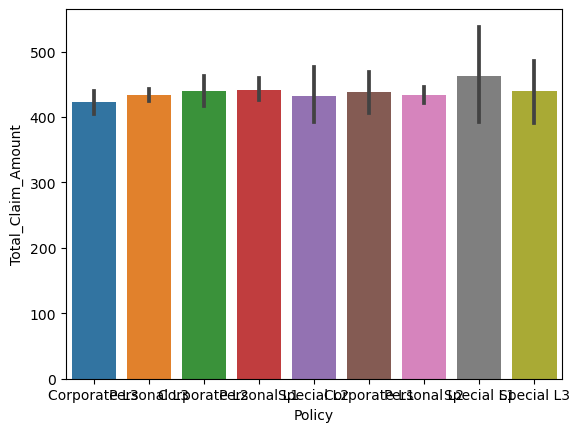

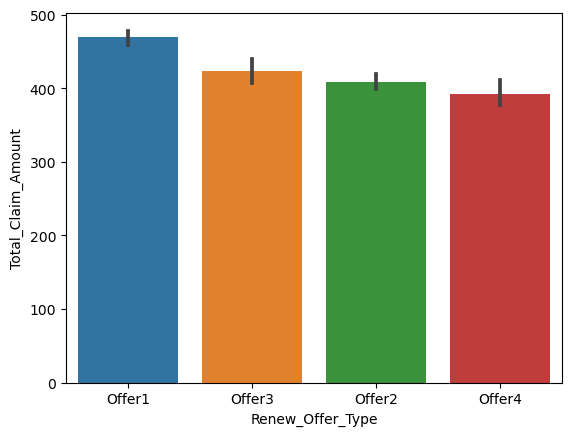

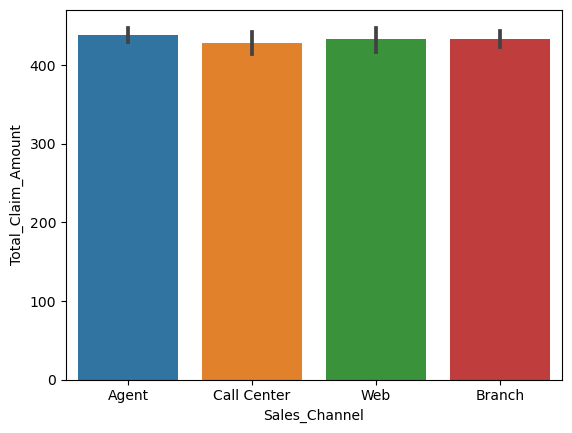

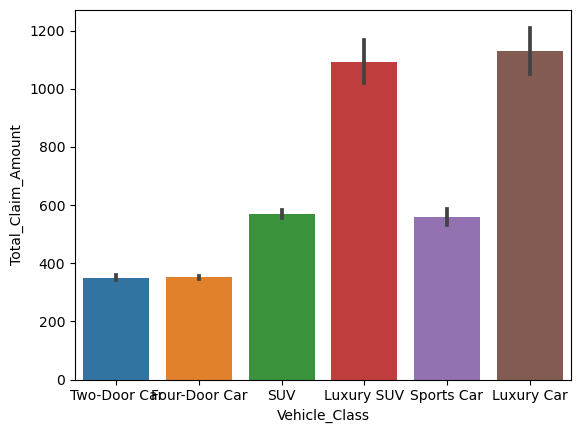

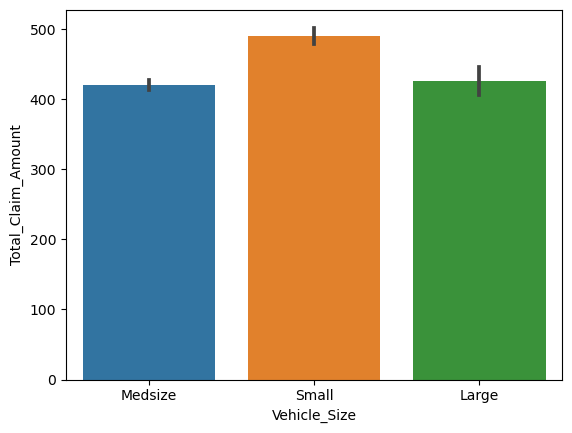

In [266]:
# Visually analyzing categorical data with Target variable

for column in customer_dfO.columns:

    sns.barplot(x=customer_dfO[column], y=customer_dfN['Total_Claim_Amount'], data=customer_dfO)
    plt.show()


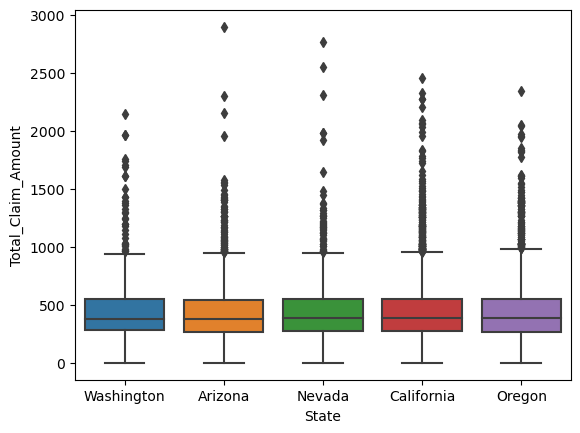

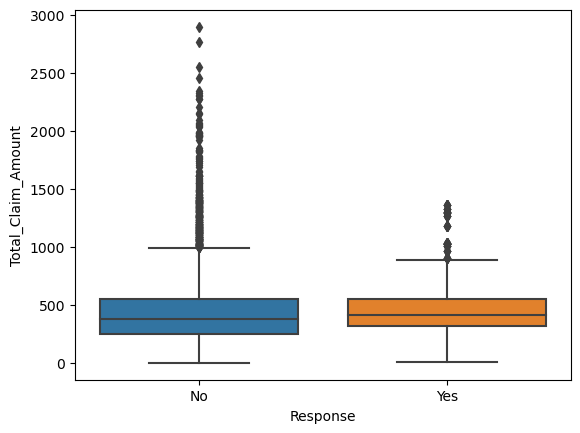

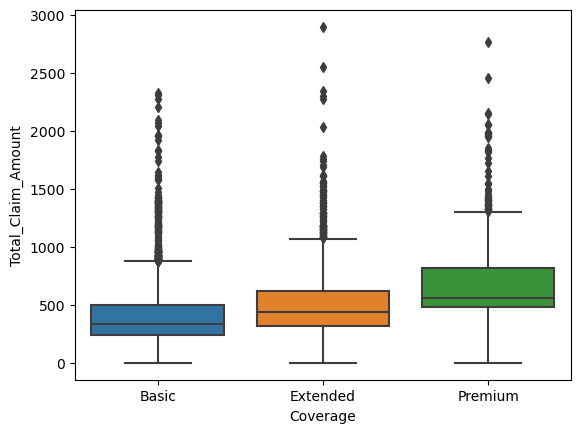

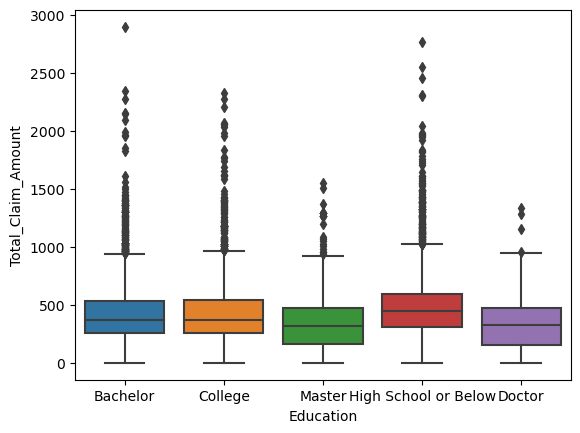

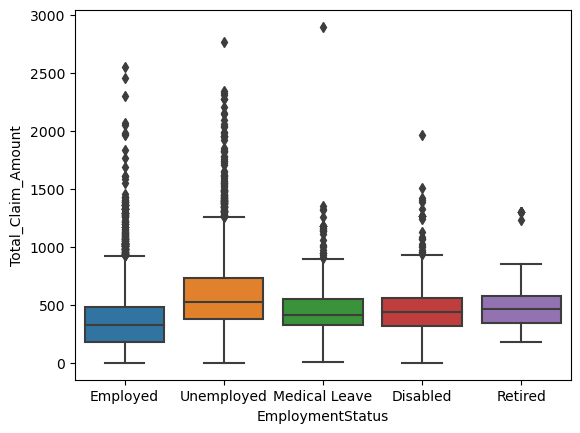

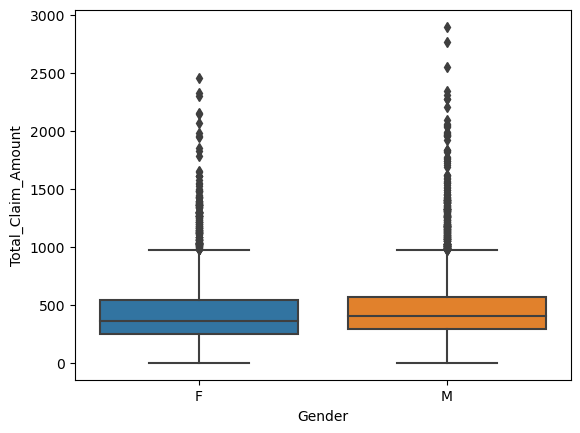

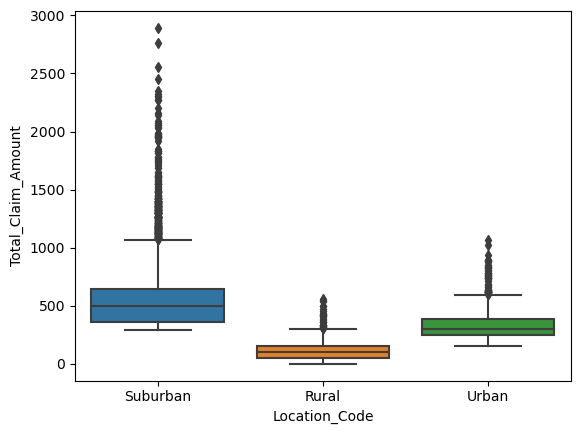

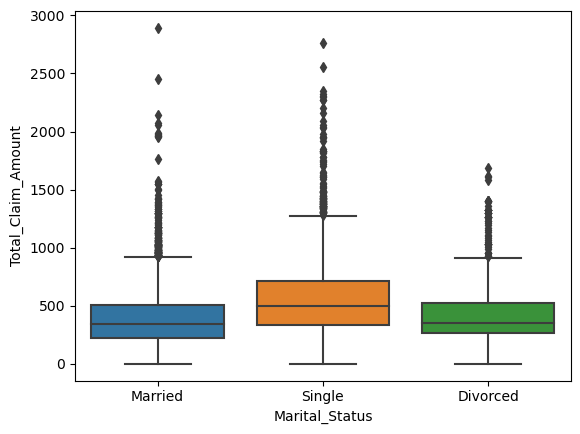

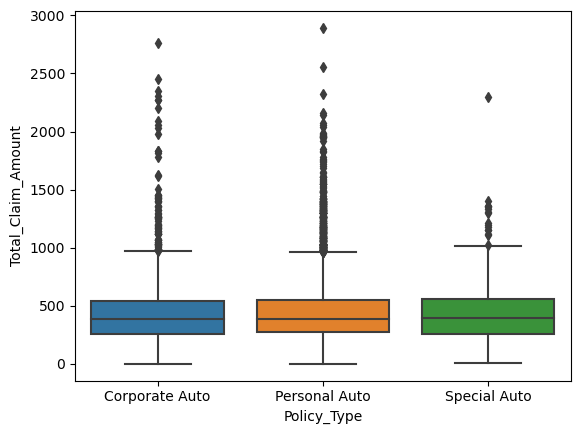

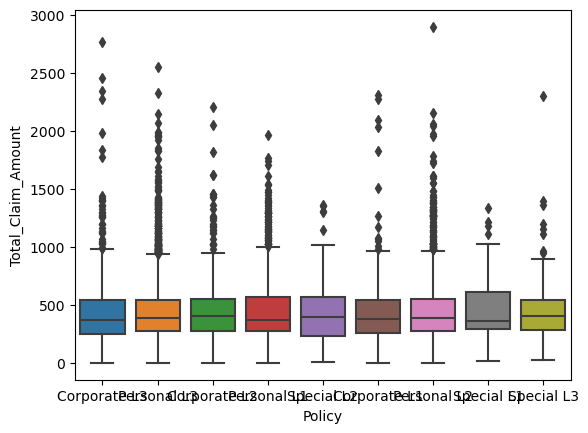

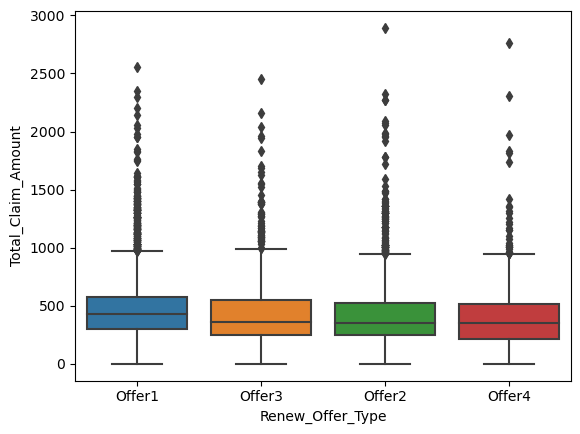

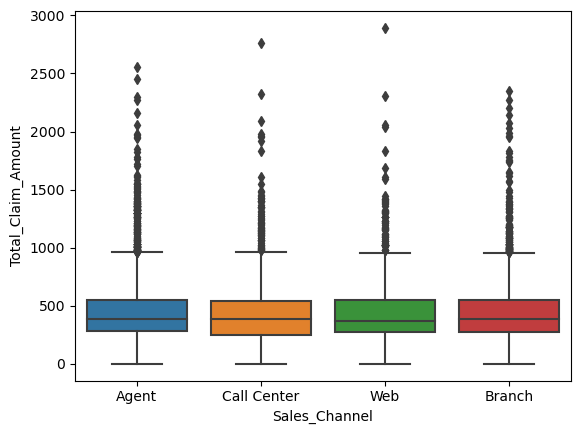

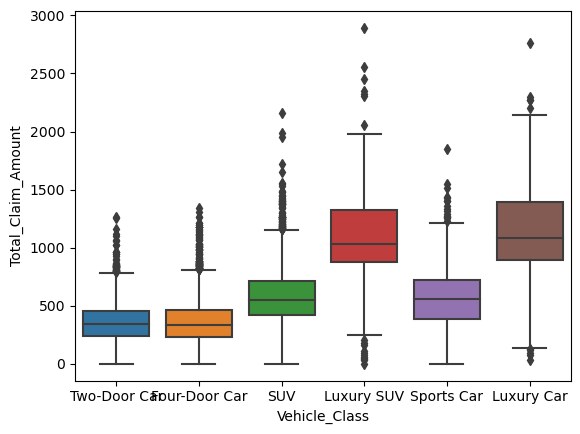

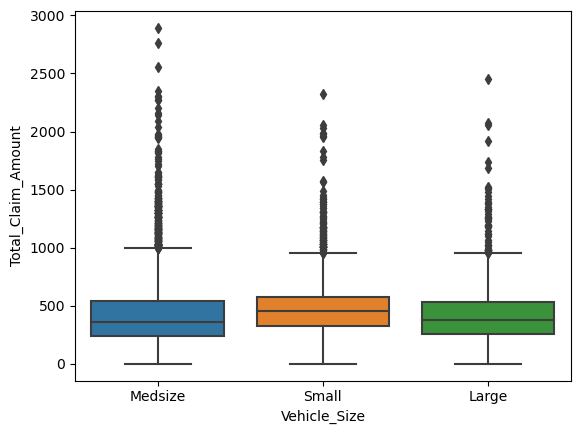

In [267]:
for column in customer_dfO.columns:
    sns.boxplot(x=column, y=customer_dfN['Total_Claim_Amount'], data=customer_dfO)
    plt.show()


10. Check all columns for *NaN* values. Decide what (if anything) you will need to do with them.


In [268]:
# Checking for null values
nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_dfO))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,Customer,0.0
1,State,0.0
22,Vehicle_Class,0.0
21,Total_Claim_Amount,0.0
20,Sales_Channel,0.0
19,Renew_Offer_Type,0.0
18,Policy,0.0
17,Policy_Type,0.0
16,Number_of_Policies,0.0
15,Number_of_Open_Complaints,0.0
